# Read results

## Librairies

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Parameters 

In [2]:
cwd = os.getcwd()

In [3]:
path = "../results/Synthetic/"

In [34]:
# === Choose p for which results are to be computed ===
p_values = [4000] # 2000, 3000, 4000
n__values =  [10]

# percent_relevent_values = [4.6] # 4.25
percent_relevent_values = [n__values[0] / np.log(p_values[0]) * 3.5]

percent_values = [1.25, 2.5, 3.75, 5.0]#, 6.25, 7.5]

## Get scores 

In [35]:
results_d = {}

# level 1
for p in p_values:

    results_folder = os.path.join(path, f"synthetic_data_{p}")
    

    ns = [int(p//n_) for n_ in n__values]
    nzs = [int(p*percent//100) for percent in percent_values]
    nrs = [int(p*percent//100) for percent in percent_relevent_values]

    fts_modes = ["full", "random", "k-best", "lasso", "pk-lpnn"]
    models = ["knn", "lr", "nb-gaussian"]
        
    results_d[p] = {}
    
    # level 2
    for n in ns:
        
        results_d[p][n] = {}
        nr = nrs[0]  # XXX
        
        # level 3
        for nz in nzs:

            results_d[p][n][nz] = {}
            
            for fts_mode in fts_modes:

                results_d[p][n][nz][fts_mode] = {}

                for model in models:

                    with open( os.path.join(results_folder, f"{n}", f"{nz}", f"{fts_mode}_{nz}_{model}.pkl"), "rb" ) as fh: #XXXXX

                        results = pickle.load(fh)
                        f1 = np.mean(results["f1"]).round(3)
                        b_acc = np.mean(results["b_acc"]).round(3)
                        # print("f1: ", f1, "b_acc: ", b_acc)

                        results_d[p][n][nz][fts_mode][model] = (f1, b_acc)

In [36]:
# results_d

## Scores tables

In [37]:
results_df = {}

for p in p_values:
    
    print("****************")
    print(f"*** p = {p} ***")
    print("****************\n")
    
    ns = [int(p//n_) for n_ in n__values]
    nzs = [int(p*percent//100) for percent in percent_values]
    nrs = [int(p*percent//100) for percent in percent_relevent_values]
    
    results_df[p] = {}
    
    for n in ns:
        
        results_df[p][n] = {}
        nr = nrs[0]  # XXX

        for nz in nzs:

            results_df[p][n][nz] = pd.DataFrame.from_dict(results_d[p][n][nz], orient='index')
            print(f"*** n = {n}, nb_relevant = {nr} ({n}_{nr}), N_z = {nz} ***")
            display(results_df[p][n][nz])
            print(results_df[p][n][nz].to_latex(bold_rows=True, 
                                                column_format="l | ccc", 
                                               )
                 ) # latex code
            print("\n")

****************
*** p = 4000 ***
****************

*** n = 400, nb_relevant = 168 (400_168), N_z = 50 ***


,knn,lr,nb-gaussian
full,"(0.588, 0.6)","(0.818, 0.823)","(0.745, 0.751)"
random,"(0.532, 0.543)","(0.629, 0.636)","(0.595, 0.602)"
k-best,"(0.682, 0.691)","(0.728, 0.736)","(0.722, 0.728)"
lasso,"(0.717, 0.725)","(0.755, 0.761)","(0.764, 0.769)"
pk-lpnn,"(0.725, 0.733)","(0.777, 0.782)","(0.78, 0.785)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.588), np.float64(0.6)) & (np.float64(0.818), np.float64(0.823)) & (np.float64(0.745), np.float64(0.751)) \\
\textbf{random} & (np.float64(0.532), np.float64(0.543)) & (np.float64(0.629), np.float64(0.636)) & (np.float64(0.595), np.float64(0.602)) \\
\textbf{k-best} & (np.float64(0.682), np.float64(0.691)) & (np.float64(0.728), np.float64(0.736)) & (np.float64(0.722), np.float64(0.728)) \\
\textbf{lasso} & (np.float64(0.717), np.float64(0.725)) & (np.float64(0.755), np.float64(0.761)) & (np.float64(0.764), np.float64(0.769)) \\
\textbf{pk-lpnn} & (np.float64(0.725), np.float64(0.733)) & (np.float64(0.777), np.float64(0.782)) & (np.float64(0.78), np.float64(0.785)) \\
\bottomrule
\end{tabular}



*** n = 400, nb_relevant = 168 (400_168), N_z = 100 ***


,knn,lr,nb-gaussian
full,"(0.588, 0.6)","(0.818, 0.823)","(0.745, 0.751)"
random,"(0.549, 0.561)","(0.707, 0.713)","(0.626, 0.634)"
k-best,"(0.69, 0.697)","(0.746, 0.753)","(0.725, 0.732)"
lasso,"(0.716, 0.724)","(0.777, 0.782)","(0.76, 0.767)"
pk-lpnn,"(0.732, 0.74)","(0.816, 0.82)","(0.816, 0.82)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.588), np.float64(0.6)) & (np.float64(0.818), np.float64(0.823)) & (np.float64(0.745), np.float64(0.751)) \\
\textbf{random} & (np.float64(0.549), np.float64(0.561)) & (np.float64(0.707), np.float64(0.713)) & (np.float64(0.626), np.float64(0.634)) \\
\textbf{k-best} & (np.float64(0.69), np.float64(0.697)) & (np.float64(0.746), np.float64(0.753)) & (np.float64(0.725), np.float64(0.732)) \\
\textbf{lasso} & (np.float64(0.716), np.float64(0.724)) & (np.float64(0.777), np.float64(0.782)) & (np.float64(0.76), np.float64(0.767)) \\
\textbf{pk-lpnn} & (np.float64(0.732), np.float64(0.74)) & (np.float64(0.816), np.float64(0.82)) & (np.float64(0.816), np.float64(0.82)) \\
\bottomrule
\end{tabular}



*** n = 400, nb_relevant = 168 (400_168), N_z = 150 ***


,knn,lr,nb-gaussian
full,"(0.588, 0.6)","(0.818, 0.823)","(0.745, 0.751)"
random,"(0.555, 0.564)","(0.752, 0.758)","(0.648, 0.655)"
k-best,"(0.693, 0.7)","(0.778, 0.784)","(0.737, 0.743)"
lasso,"(0.716, 0.724)","(0.777, 0.782)","(0.76, 0.767)"
pk-lpnn,"(0.742, 0.749)","(0.829, 0.833)","(0.818, 0.823)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.588), np.float64(0.6)) & (np.float64(0.818), np.float64(0.823)) & (np.float64(0.745), np.float64(0.751)) \\
\textbf{random} & (np.float64(0.555), np.float64(0.564)) & (np.float64(0.752), np.float64(0.758)) & (np.float64(0.648), np.float64(0.655)) \\
\textbf{k-best} & (np.float64(0.693), np.float64(0.7)) & (np.float64(0.778), np.float64(0.784)) & (np.float64(0.737), np.float64(0.743)) \\
\textbf{lasso} & (np.float64(0.716), np.float64(0.724)) & (np.float64(0.777), np.float64(0.782)) & (np.float64(0.76), np.float64(0.767)) \\
\textbf{pk-lpnn} & (np.float64(0.742), np.float64(0.749)) & (np.float64(0.829), np.float64(0.833)) & (np.float64(0.818), np.float64(0.823)) \\
\bottomrule
\end{tabular}



*** n = 400, nb_relevant = 168 (400_168), N_z = 200 ***


,knn,lr,nb-gaussian
full,"(0.588, 0.6)","(0.818, 0.823)","(0.745, 0.751)"
random,"(0.557, 0.567)","(0.785, 0.79)","(0.663, 0.67)"
k-best,"(0.689, 0.697)","(0.791, 0.798)","(0.742, 0.748)"
lasso,"(0.716, 0.724)","(0.777, 0.782)","(0.76, 0.767)"
pk-lpnn,"(0.726, 0.734)","(0.834, 0.839)","(0.819, 0.823)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.588), np.float64(0.6)) & (np.float64(0.818), np.float64(0.823)) & (np.float64(0.745), np.float64(0.751)) \\
\textbf{random} & (np.float64(0.557), np.float64(0.567)) & (np.float64(0.785), np.float64(0.79)) & (np.float64(0.663), np.float64(0.67)) \\
\textbf{k-best} & (np.float64(0.689), np.float64(0.697)) & (np.float64(0.791), np.float64(0.798)) & (np.float64(0.742), np.float64(0.748)) \\
\textbf{lasso} & (np.float64(0.716), np.float64(0.724)) & (np.float64(0.777), np.float64(0.782)) & (np.float64(0.76), np.float64(0.767)) \\
\textbf{pk-lpnn} & (np.float64(0.726), np.float64(0.734)) & (np.float64(0.834), np.float64(0.839)) & (np.float64(0.819), np.float64(0.823)) \\
\bottomrule
\end{tabular}





In [38]:
# # === IMPORTANT: RUN THIS CELL ONLY ONCE TO CREATE THE DICT ====
# pklpnn_results_d = {}

In [39]:
for p in p_values:
    pklpnn_results_d[p] = {}
    for n in results_d[p].keys():
        for nz in results_d[p][n].keys():
            pklpnn_results_d[p][nz] = results_d[p][n][nz]['pk-lpnn']

In [40]:
pklpnn_results_d

{1000: {12: {'knn': (np.float64(0.716), np.float64(0.742)),
   'lr': (np.float64(0.731), np.float64(0.752)),
   'nb-gaussian': (np.float64(0.725), np.float64(0.744))},
  25: {'knn': (np.float64(0.745), np.float64(0.768)),
   'lr': (np.float64(0.739), np.float64(0.758)),
   'nb-gaussian': (np.float64(0.751), np.float64(0.771))},
  37: {'knn': (np.float64(0.738), np.float64(0.763)),
   'lr': (np.float64(0.746), np.float64(0.768)),
   'nb-gaussian': (np.float64(0.735), np.float64(0.757))},
  50: {'knn': (np.float64(0.75), np.float64(0.775)),
   'lr': (np.float64(0.759), np.float64(0.778)),
   'nb-gaussian': (np.float64(0.749), np.float64(0.773))}},
 2000: {25: {'knn': (np.float64(0.696), np.float64(0.709)),
   'lr': (np.float64(0.737), np.float64(0.746)),
   'nb-gaussian': (np.float64(0.74), np.float64(0.749))},
  50: {'knn': (np.float64(0.717), np.float64(0.73)),
   'lr': (np.float64(0.797), np.float64(0.804)),
   'nb-gaussian': (np.float64(0.803), np.float64(0.811))},
  75: {'knn': (np.

In [41]:
df_tex_l = []

for p in p_values:
    
    dico = pklpnn_results_d[p]
            
    df = pd.DataFrame.from_dict(dico, orient="columns")
    df_tex = df.to_latex(bold_rows=True, column_format="l | cccc", header=[r"1.25\%", r"2.5\%", r"3.75\%", r"5\%"])
    df_tex_l.append(df_tex)

In [42]:
for t in df_tex_l:
    print(t)

\begin{tabular}{l | cccc}
\toprule
 & 1.25\% & 2.5\% & 3.75\% & 5\% \\
\midrule
\textbf{knn} & (np.float64(0.725), np.float64(0.733)) & (np.float64(0.732), np.float64(0.74)) & (np.float64(0.742), np.float64(0.749)) & (np.float64(0.726), np.float64(0.734)) \\
\textbf{lr} & (np.float64(0.777), np.float64(0.782)) & (np.float64(0.816), np.float64(0.82)) & (np.float64(0.829), np.float64(0.833)) & (np.float64(0.834), np.float64(0.839)) \\
\textbf{nb-gaussian} & (np.float64(0.78), np.float64(0.785)) & (np.float64(0.816), np.float64(0.82)) & (np.float64(0.818), np.float64(0.823)) & (np.float64(0.819), np.float64(0.823)) \\
\bottomrule
\end{tabular}



## Get progressions

### Percentage Nz

In [43]:
# Dictionnaire pour stocker les pourcentages de progression
progression_percentages = {}

# Boucle sur les valeurs de `p`
for p in p_values:
    progression_percentages[p] = {}

    # Boucle sur les `n`
    for n in results_d[p]:
        progression_percentages[p][n] = {}

        # Boucle sur les `nz`
        for nz in results_d[p][n]:
            progression_percentages[p][n][nz] = {}

            # Récupérer les résultats pour les modèles
            for model in models:
                # Vérifiez si pk-lpnn, lasso, et k-best existent
                if "pk-lpnn" in results_d[p][n][nz] and model in results_d[p][n][nz]["pk-lpnn"]:
                    pk_lpnn_f1, pk_lpnn_b_acc = results_d[p][n][nz]["pk-lpnn"][model]

                    for mode in ["lasso", "k-best"]:
                        if mode in results_d[p][n][nz] and model in results_d[p][n][nz][mode]:
                            mode_f1, mode_b_acc = results_d[p][n][nz][mode][model]

                            # Calcul des pourcentages de progression
                            f1_progression = ((pk_lpnn_f1 - mode_f1) / mode_f1) * 100
                            b_acc_progression = ((pk_lpnn_b_acc - mode_b_acc) / mode_b_acc) * 100

                            # Stocker les résultats dans le dictionnaire
                            progression_percentages[p][n][nz].setdefault(model, {})
                            progression_percentages[p][n][nz][model][mode] = {
                                "f1_progression": round(f1_progression, 2),
                                "b_acc_progression": round(b_acc_progression, 2),
                            }

# Résumé dans un tableau DataFrame
summary_tables = {}

for p in progression_percentages:
    for n in progression_percentages[p]:
        for nz in progression_percentages[p][n]:
            table_data = []
            for model in progression_percentages[p][n][nz]:
                for mode, metrics in progression_percentages[p][n][nz][model].items():
                    table_data.append([model, mode, metrics["f1_progression"], metrics["b_acc_progression"]])

            # Créer un DataFrame pour chaque combinaison de p, n, et nz
            summary_tables[(p, n, nz)] = pd.DataFrame(
                table_data,
                columns=["Model", "Mode", "F1 Progression (%)", "Balanced Accuracy Progression (%)"],
            )

# Affichage des tables
for key, table in summary_tables.items():
    p, n, nz = key
    print(f"Table for p = {p}, n = {n}, nz = {nz}:\n")
    display(table)
    print("\n")


Table for p = 4000, n = 400, nz = 50:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,1.12,1.10
1,knn,k-best,6.30,6.08
2,lr,lasso,2.91,2.76
3,lr,k-best,6.73,6.25
4,nb-gaussian,lasso,2.09,2.08
5,nb-gaussian,k-best,8.03,7.83




Table for p = 4000, n = 400, nz = 100:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,2.23,2.21
1,knn,k-best,6.09,6.17
2,lr,lasso,5.02,4.86
3,lr,k-best,9.38,8.90
4,nb-gaussian,lasso,7.37,6.91
5,nb-gaussian,k-best,12.55,12.02




Table for p = 4000, n = 400, nz = 150:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,3.63,3.45
1,knn,k-best,7.07,7.00
2,lr,lasso,6.69,6.52
3,lr,k-best,6.56,6.25
4,nb-gaussian,lasso,7.63,7.30
5,nb-gaussian,k-best,10.99,10.77




Table for p = 4000, n = 400, nz = 200:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,1.40,1.38
1,knn,k-best,5.37,5.31
2,lr,lasso,7.34,7.29
3,lr,k-best,5.44,5.14
4,nb-gaussian,lasso,7.76,7.30
5,nb-gaussian,k-best,10.38,10.03


### Percentage Global

In [44]:
# Initialisation des listes pour les résultats
lasso_data = []
kbest_data = []

# Collecte des données pour k-best et lasso
for p in progression_percentages:
    for n in progression_percentages[p]:
        for nz, metrics in progression_percentages[p][n].items():
            # Calculer le pourcentage de Nz
            nz_percentage = round(((nz / p) * 100),4)
            
            # Collecte des données pour chaque méthode
            for model in models:
                # Pour lasso
                if "lasso" in metrics[model]:
                    lasso_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": metrics[model]["lasso"].get("f1_progression", 0),
                        "Balanced Accuracy Progression": metrics[model]["lasso"].get("b_acc_progression", 0)
                    })
                else:
                    lasso_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": 0,
                        "Balanced Accuracy Progression": 0
                    })
                
                # Pour k-best
                if "k-best" in metrics[model]:
                    kbest_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": metrics[model]["k-best"].get("f1_progression", 0),
                        "Balanced Accuracy Progression": metrics[model]["k-best"].get("b_acc_progression", 0)
                    })
                else:
                    kbest_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": 0,
                        "Balanced Accuracy Progression": 0
                    })

# Création des DataFrames pour lasso et k-best
lasso_df = pd.DataFrame(lasso_data)
kbest_df = pd.DataFrame(kbest_data)

# Affichage des DataFrames pour chaque méthode
print("Lasso Results DataFrame:")
display(lasso_df)

print("K-Best Results DataFrame:")
display(kbest_df)


Lasso Results DataFrame:


,Nz Percentage,Model,F1 Progression,Balanced Accuracy Progression
0,1.25,knn,1.12,1.10
1,1.25,lr,2.91,2.76
2,1.25,nb-gaussian,2.09,2.08
3,2.50,knn,2.23,2.21
4,2.50,lr,5.02,4.86
5,2.50,nb-gaussian,7.37,6.91
6,3.75,knn,3.63,3.45
7,3.75,lr,6.69,6.52
8,3.75,nb-gaussian,7.63,7.30
9,5.00,knn,1.40,1.38


K-Best Results DataFrame:


,Nz Percentage,Model,F1 Progression,Balanced Accuracy Progression
0,1.25,knn,6.30,6.08
1,1.25,lr,6.73,6.25
2,1.25,nb-gaussian,8.03,7.83
3,2.50,knn,6.09,6.17
4,2.50,lr,9.38,8.90
5,2.50,nb-gaussian,12.55,12.02
6,3.75,knn,7.07,7.00
7,3.75,lr,6.56,6.25
8,3.75,nb-gaussian,10.99,10.77
9,5.00,knn,5.37,5.31


### Save percentages

In [51]:
def save_dataframe_as_image(df, file_name):
    fig, ax = plt.subplots(figsize=(10, len(df) * 0.5 + 1))  # Ajuster la taille en fonction des données
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    
    plt.savefig(file_name, bbox_inches="tight", dpi=300)
    plt.close()

# Sauvegarde des DataFrames sous forme d'images
# save_dataframe_as_image(lasso_df, f"lasso_results_{p}.png")
# save_dataframe_as_image(kbest_df, f"kbest_results_{p}.png")

## Progession plots

In [46]:
# Initialisation des données pour les courbes
kbest_f1_progression = {model: [] for model in models}
lasso_f1_progression = {model: [] for model in models}
kbest_b_acc_progression = {model: [] for model in models}
lasso_b_acc_progression = {model: [] for model in models}
nz_percentages = []  # Stockage des pourcentages de Nz

# Extraction des données
for p in progression_percentages:
    for n in progression_percentages[p]:
        for nz, metrics in progression_percentages[p][n].items():
            # Calculer le pourcentage de Nz
            nz_percentage = (nz / p) * 100
            if nz_percentage not in nz_percentages:
                nz_percentages.append(nz_percentage)

            # Progression pour chaque modèle dans les modes k-best et lasso
            for model in models:
                if model in metrics:
                    if "k-best" in metrics[model]:
                        kbest_f1_progression[model].append(metrics[model]["k-best"].get("f1_progression", 0))
                        kbest_b_acc_progression[model].append(metrics[model]["k-best"].get("b_acc_progression", 0))
                    else:
                        kbest_f1_progression[model].append(0)
                        kbest_b_acc_progression[model].append(0)
                    
                    if "lasso" in metrics[model]:
                        lasso_f1_progression[model].append(metrics[model]["lasso"].get("f1_progression", 0))
                        lasso_b_acc_progression[model].append(metrics[model]["lasso"].get("b_acc_progression", 0))
                    else:
                        lasso_f1_progression[model].append(0)
                        lasso_b_acc_progression[model].append(0)

In [47]:
def model_name(model):
    if model == "nb-gaussian":
        return "NBC"
    else:
        return model.upper()

In [48]:
save_folder = "../results/Synthetic/plots"

In [49]:
# Fonction pour tracer les courbes
def plot_progressions(nz_percentages, progression_data, p, metrics, save=False):

    progression_data_lasso = progression_data[0]
    progression_data_kbest = progression_data[1]
    
    plt.figure(figsize=(7, 4))
    
    for model, progression in progression_data_lasso.items():
        plt.plot(nz_percentages, progression, marker='o', 
                 label=model_name(model),
                 linewidth=2,
                 linestyle="-", 
                )
        
    plt.gca().set_prop_cycle(None)
    
    for model, progression in progression_data_kbest.items():
        plt.plot(nz_percentages, progression, marker='o', 
                 #label=model_name(model),
                 linewidth=2,
                 linestyle="--",
                )

    # plt.axhline(y=0, color='grey', linewidth=2, linestyle='-')
    y_min = plt.ylim()[0] if plt.ylim()[0] < 0 else 0
    plt.axhspan(y_min, 0, facecolor="grey", alpha=0.3)
    
    plt.title("LPNN-FS vs LASSO (solid) and LPNN-FS vs k-best (dashed)")
    plt.xlabel("Percentage of $N_z$ (%)", size=12)
    plt.ylabel(f"{metrics} Progression (%)", size=12)
    plt.grid(False)
    plt.legend(loc="upper right")
    plt.tight_layout()
    if save==True:
        plt.savefig(os.path.join(save_folder, f"progression_{metrics}_p={p}.pdf"))
    plt.show()

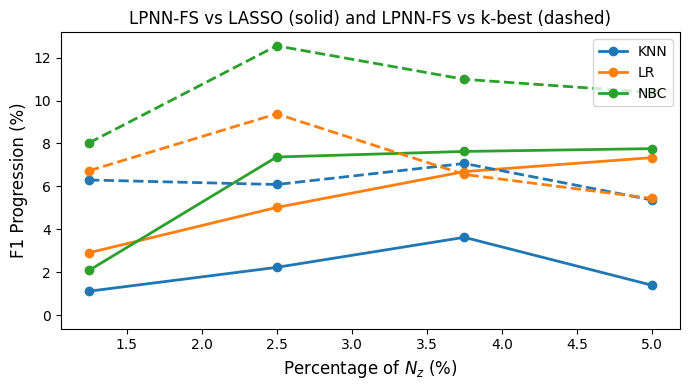

In [50]:
# Graphiques pour k-best
plot_progressions(
    nz_percentages,
    [lasso_f1_progression, kbest_f1_progression],
    p=p_values[0], metrics="F1",
    save=True
)